<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# Day 1 - Assignment - Solution

### About

> Let us have a closer look at the forecast data from both models for one observation station in Tenerife (Canary Islands). Let us plot the time-series of the CAMS and MONARCH forecasts together in one plot.


### Tasks

#### 1. Download and animate the CAMS global atmopsheric composition forecast for 21 February 2020
  * Download the CAMS global atmospheric composition forecast for 21 February 2020, with the following specifications:
    > Variable on single levels: `Dust aerosol optical depth at 550 nm` <br>
    > Date (Start and end): `2020-02-21` <br>
    > Time: `12:00` <br>
    > Leadtime hour: every three hours from `0 to 90` <br>
    > Type: `Forecast` <br>
    > Restricted area: `N: 67, W: -30, E: 71, S: -3` <br>
    > Format: `Zipped netCDF` <br>
  * **Hint** 
    * [CAMS global atmospheric composition forecasts - Example notebook](../../dust_workshop_part1/03_model-based_data/32_CAMS_global_forecast_duaod_load_browse.ipynb)
    * [Data access](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts)

#### 2. Look up the coordinates of the AERONET station *Santa Cruz, Tenerife*
  * **Hint**
    * You can see an overview of all available AERONET Site Names [here](https://aeronet.gsfc.nasa.gov/cgi-bin/draw_map_display_aod_v3?long1=-180&long2=180&lat1=-90&lat2=90&multiplier=2&what_map=4&nachal=1&formatter=0&level=3&place_code=10&place_limit=0)

#### 3. Select the time-series for CAMS global atmospheric composition forecasts for Santa Cruz, Tenerife
  * **Hint**
    * With the xarray function `sel()` and keyword argument `method='nearest'` you can select data based on coordinate information
    * We also recommend you to transform your xarray.DataArray into a pandas.DataFrame with the function `to_dataframe()` and save it as `csv` with the function `to_csv()`

#### 4. Load the MONARCH dust forecasts and select time-series for Santa Cruz, Tenerife
  * **Hint**
    * With the xarray function `sel()` and keyword argument `method='nearest'` you can select data based on coordinate information
    * We also recommend you to transform your xarray.DataArray into a pandas.DataFrame with the function `to_dataframe()` and save it as `csv` with the function `to_csv()`

#### 5. Visualize both time-series of CAMS and MONARCH forecasts together in one plot

<br>

### Module outline
* [1 - Load and animate CAMS global atmospheric composition forecasts](#cams_forecast)
* [2 - Select latitude / longitude values for AERONET station *Santa Cruz, Tenerife*](#select_lat_lon_aeronet)
* [3 - Select time-series for CAMS global atmospheric composition forecasts for Santa Cruz, Tenerife](#ts_cams)
* [4 - Load the MONARCH dust forecasts and select time-series for Santa Cruz, Tenerife](#sdswas_forecast_load)
* [5 - Visualize time-series of CAMS and MONARCH forecasts in one plot](#visualize_ts)



<hr>

##### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as pl
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='cams_forecast'></a>1. Load and animate CAMS global atmospheric composition forecasts 

First, we have to download the CAMS global atmospheric composition forecast data from the [Copernicus Atmosphere Data Store](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts?tab=form) with the following specifications:
* Variable on single levels: `Dust aerosol optical depth at 550 nm`
* Date (Start and end): `2020-02-21`
* Time: `12:00`
* Leadtime hour: every three hours from `0 to 90`
* Type: `Forecast`
* Restricted area: `N: 67, W: -30, E: 71, S: -3`
* Format: `Zipped netCDF`

See the `CDSAPI` request below.

In [1]:
URL = 'https://ads.atmosphere.copernicus.eu/api/v2'
KEY = '######################'

In [ ]:
import cdsapi

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'variable': 'dust_aerosol_optical_depth_550nm',
        'date': '2020-02-21/2020-02-21',
        'time': '12:00',
        'leadtime_hour': [
            '0', '12', '15',
            '18', '21', '24',
            '27', '3', '30',
            '33', '36', '39',
            '42', '45', '48',
            '51', '54', '57',
            '6', '60', '63',
            '66', '69', '72',
            '75', '78', '81',
            '84', '87', '9',
            '90',
        ],
        'type': 'forecast',
        'area': [
            67, -30, -3,
            71,
        ],
        'format': 'netcdf_zip',
    },
    '../data/3_model/cams/global_forecast/20210204_duaod.netcdf_zip')

The first step is to unzip file from the zipped archive downloaded.

In [1]:
import zipfile
with zipfile.ZipFile('../data/cams/20200221_dustAOD.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/cams/')

<br>

Then, we can open the netCDF file with the xarray function `open_dataset()`. We see that the data has three dimensions (`latitude`, `longitude`, `time`) and one data variable:
* `duaod550`: Dust Aerosol Optical Depth at 550nm

In [3]:
file = xr.open_dataset('../data/cams/data.nc')
file

<xarray.Dataset>
Dimensions:    (longitude: 253, latitude: 176, time: 31)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.6 -29.2 -28.8 ... 70.0 70.4 70.8
  * latitude   (latitude) float32 67.0 66.6 66.2 65.8 ... -1.8 -2.2 -2.6 -3.0
  * time       (time) datetime64[ns] 2020-02-21T12:00:00 ... 2020-02-25T06:00:00
Data variables:
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-02 14:50:00 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

<br>

Let us now store the data variable `Dust Aerosol Optical Depth (AOD) at 550nm` as `xarray.DataArray` with the name `du_aod`.

In [4]:
du_aod = file.duaod550
du_aod

<xarray.DataArray 'duaod550' (time: 31, latitude: 176, longitude: 253)>
[1380368 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.6 -29.2 -28.8 ... 70.0 70.4 70.8
  * latitude   (latitude) float32 67.0 66.6 66.2 65.8 ... -1.8 -2.2 -2.6 -3.0
  * time       (time) datetime64[ns] 2020-02-21T12:00:00 ... 2020-02-25T06:00:00
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

Above, you see that the variable `du_aod` has two attributes, `units` and `long_name`. Let us define variables for those attributes. The variables can be used for visualizing the data.

In [5]:
long_name = du_aod.long_name
units = du_aod.units

Let us do the same for the coordinates `longitude` and `latitude`.

In [6]:
latitude = du_aod.latitude
longitude = du_aod.longitude

<br>

#### Visualize one forecast step of *Dust Aerosol Optical Depth at 550nm*

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Dust Aerosol Optical Depth at 550nm 2020-02-21T12:00:00.000000000'}>)

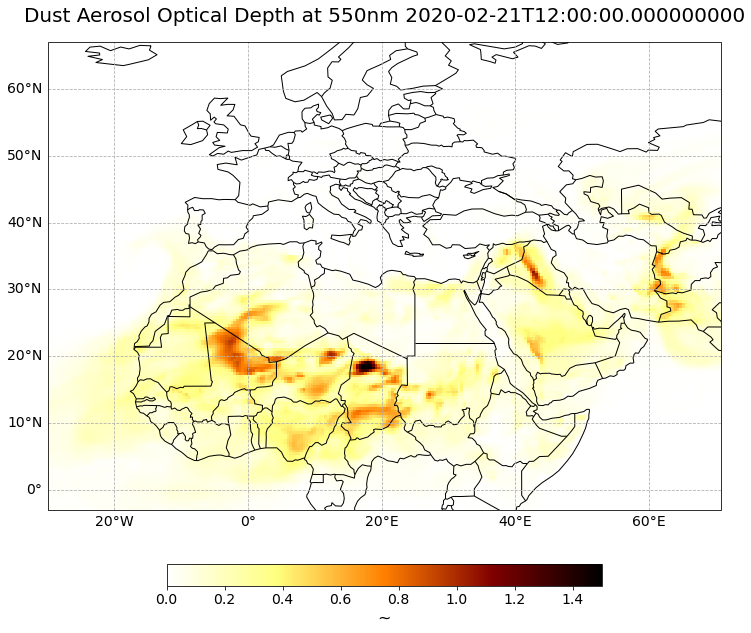

In [7]:
visualize_pcolormesh(data_array=du_aod[0,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='afmhot_r',
                     unit=units,
                     long_name=long_name + ' ' + str(du_aod[0,:,:].time.data),
                     vmin=0, 
                     vmax=1.5,
                     set_global=False,
                    lonmin=du_aod.longitude.min(),
                    lonmax=du_aod.longitude.max(),
                    latmin=du_aod.latitude.min(),
                    latmax=du_aod.latitude.max())

<br>

Now, we can also animate the forecast. The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [8]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=du_aod[0,:,:],
                               longitude=du_aod.longitude, 
                               latitude=du_aod.latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='afmhot_r', 
                               unit='-',
                               long_name=long_name + ' '+ str(du_aod.time[0].data),
                               vmin=0,
                               vmax=1, 
                                lonmin=du_aod.longitude.min(),
                                lonmax=du_aod.longitude.max(),
                                latmin=du_aod.latitude.min(),
                                latmax=du_aod.latitude.max(),
                               set_global=False)

frames = 30

def draw(i):
    img = plt.pcolormesh(du_aod.longitude, 
                         du_aod.latitude, 
                         du_aod[i,:,:], 
                         cmap='afmhot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=1,
                         shading='auto')
    
    ax.set_title(long_name + ' '+ str(du_aod.time[i].data), fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

<br>

##### Play the animation video as HTML5 video

In [9]:
HTML(ani.to_html5_video())

<br>

### <a id='select_lat_lon_aeronet'></a>2. Select latitude / longitude values for Santa Cruz, Tenerife

You can see an overview of all available AERONET Site Names [here](https://aeronet.gsfc.nasa.gov/cgi-bin/draw_map_display_aod_v3?long1=-180&long2=180&lat1=-90&lat2=90&multiplier=2&what_map=4&nachal=1&formatter=0&level=3&place_code=10&place_limit=0). Let's look up the latitude and longitude information for the station `Santa_Cruz_Tenerife` and define the coordinate information as variables.

In [10]:
lat = 28.473
lon = -16.247

<br>

### <a id='ts_cams'></a>3. Select time-series for CAMS global atmospheric composition forecasts

From the loaded xarray data array `du_aod`, we can now select the values for one specific point location. We can select coordinate information with the function `sel()`. We have to make sure to set the keyword argument `method='nearest'`. With this keyword argument, the closest grid location in the data array is used for the time-series retrieval.

In [11]:
cams_ts = du_aod.sel(longitude=lon, latitude=lat, method='nearest')
cams_ts

<xarray.DataArray 'duaod550' (time: 31)>
array([5.676746e-04, 5.676746e-04, 1.460314e-03, 2.421856e-03, 5.305767e-03,
       1.128006e-02, 8.077216e-02, 2.031391e-01, 3.358061e-01, 5.017774e-01,
       5.811578e-01, 7.555066e-01, 1.102213e+00, 1.210434e+00, 1.024824e+00,
       9.059588e-01, 7.769997e-01, 6.033378e-01, 5.451070e-01, 4.923698e-01,
       3.647155e-01, 2.810775e-01, 1.702471e-01, 2.191389e-01, 3.551019e-01,
       5.156484e-01, 6.221528e-01, 8.869376e-01, 1.008824e+00, 7.652575e-01,
       6.062905e-01], dtype=float32)
Coordinates:
    longitude  float32 -16.4
    latitude   float32 28.6
  * time       (time) datetime64[ns] 2020-02-21T12:00:00 ... 2020-02-25T06:00:00
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

<br>

Time-series information is better to handle via the Python library [Pandas](https://pandas.pydata.org/). You can use the function `to_dataframe()` to convert a xarray.DataArray into a pandas.DataFrame.

In [12]:
cams_ts_df = cams_ts.to_dataframe()
cams_ts_df

,longitude,latitude,duaod550
time,,,
2020-02-21 12:00:00,-16.4,28.6,0.000568
2020-02-21 15:00:00,-16.4,28.6,0.000568
2020-02-21 18:00:00,-16.4,28.6,0.001460
2020-02-21 21:00:00,-16.4,28.6,0.002422
2020-02-22 00:00:00,-16.4,28.6,0.005306
2020-02-22 03:00:00,-16.4,28.6,0.011280
2020-02-22 06:00:00,-16.4,28.6,0.080772
2020-02-22 09:00:00,-16.4,28.6,0.203139
2020-02-22 12:00:00,-16.4,28.6,0.335806


<br>

The last step is now to safe the pandas dataframe as csv file. This allows us to easily load the time-series again later. You can use the function `to_csv()` to save a pandas.DataFrame as csv.

In [19]:
cams_ts_df.to_csv("../data/cams_ts.csv", index_label='time')

<br>

### <a id='sdswas_forecast_load'>4. Load MONARCH dust forecasts and select time-series

The first step is to load a `MONARCH` forecast file. The data is disseminated in the `netCDF` format on a daily basis, with the forecast initialisation at 12:00 UTC. Load the `MONARCH` dust forecast of 21 February 2020. You can use the function `open_dataset()` from the xarray Python library.

Once loaded, you see that the data has three dimensions: `lat`, `lon` and `time`; and offers two data variables `od550_dust` and `sconc_dust`.

In [13]:
filepath = '../data/sds_was/2020022112_3H_NMMB-BSC.nc'
file = xr.open_dataset(filepath)
file

<xarray.Dataset>
Dimensions:     (lon: 307, lat: 211, time: 25)
Coordinates:
  * lon         (lon) float64 -31.0 -30.67 -30.33 -30.0 ... 70.33 70.67 71.0
  * lat         (lat) float64 -3.0 -2.667 -2.333 -2.0 ... 66.0 66.33 66.67 67.0
  * time        (time) datetime64[ns] 2020-02-21T12:00:00 ... 2020-02-24T12:0...
Data variables:
    od550_dust  (time, lat, lon) float32 ...
    sconc_dust  (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.5.4 (http://c...
    Conventions:               CF-1.2
    history:                   Fri Feb 21 23:50:54 2020: cdo remapbil,regular...
    _FillValue:                -32767.0
    missing_value:             -32767.0
    title:                     Regional Reanalysis 0.5x0.5 deg NMMB-BSC-Dust ...
    History:                   Fri Feb 21 22:12:45 2020: ncrcat -F -O pout_re...
    Grid_type:                 B-grid: vectors interpolated to scalar positions
    Map_Proj:                  Rotated latitude longitude
    NCO:                       4.0.8
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.5.4 (http://c...

<br>

Let us then retrieve the data variable `od550_dust`, which is the dust optical depth at 550 nm.

In [14]:
od_dust_sdswas = file['od550_dust']
od_dust_sdswas

<xarray.DataArray 'od550_dust' (time: 25, lat: 211, lon: 307)>
[1619425 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -31.0 -30.67 -30.33 -30.0 ... 70.0 70.33 70.67 71.0
  * lat      (lat) float64 -3.0 -2.667 -2.333 -2.0 ... 66.0 66.33 66.67 67.0
  * time     (time) datetime64[ns] 2020-02-21T12:00:00 ... 2020-02-24T12:00:00
Attributes:
    long_name:  dust optical depth at 550 nm
    units:       
    title:      dust optical depth at 550 nm

<br>

Now, we can also select the time-series for the location *Santa Cruz, Tenerife* from the WMO SDS-WAS forecast data. We again use the function `sel()` together with the keyword argument `method='nearest'` to select the forecast time-series of the closest grid point.

In [15]:
sds_was_ts = od_dust_sdswas.sel(lon=lon, lat=lat, method='nearest')
sds_was_ts

<xarray.DataArray 'od550_dust' (time: 25)>
array([5.792578e-05, 1.870866e-05, 2.691938e-05, 2.069314e-04, 8.895606e-04,
       1.751463e-03, 9.110953e-03, 5.093248e-02, 2.034178e-01, 3.637045e-01,
       4.338350e-01, 1.095499e+00, 2.165373e+00, 2.052835e+00, 8.611195e-01,
       7.533937e-01, 4.669310e-01, 3.542736e-01, 3.206273e-01, 2.312253e-01,
       1.795649e-01, 2.214468e-01, 4.775718e-01, 7.005243e-01, 1.151538e+00],
      dtype=float32)
Coordinates:
    lon      float64 -16.33
    lat      float64 28.33
  * time     (time) datetime64[ns] 2020-02-21T12:00:00 ... 2020-02-24T12:00:00
Attributes:
    long_name:  dust optical depth at 550 nm
    units:       
    title:      dust optical depth at 550 nm

<br>

And now, we also want to save the MONARCH forecast time-series as pandas.DataFrame in a csv file. You can combine both functions (`to_dataframe()` and `to_csv`) in one line of code.

In [25]:
sds_was_ts.to_dataframe().to_csv("../data/sdswas_ts.csv", index_label='time')

<br>

### <a id='visualize_ts'></a>5. Visualize time-series of CAMS and MONARCH forecasts together in one plot

The last step is to visualize both pandas.DataFrame objects (`sds_was_ts` and `cams_ts_df`) as line plots. You can use the generic `plot()` function from matplotlib to visualize a simple line plot.

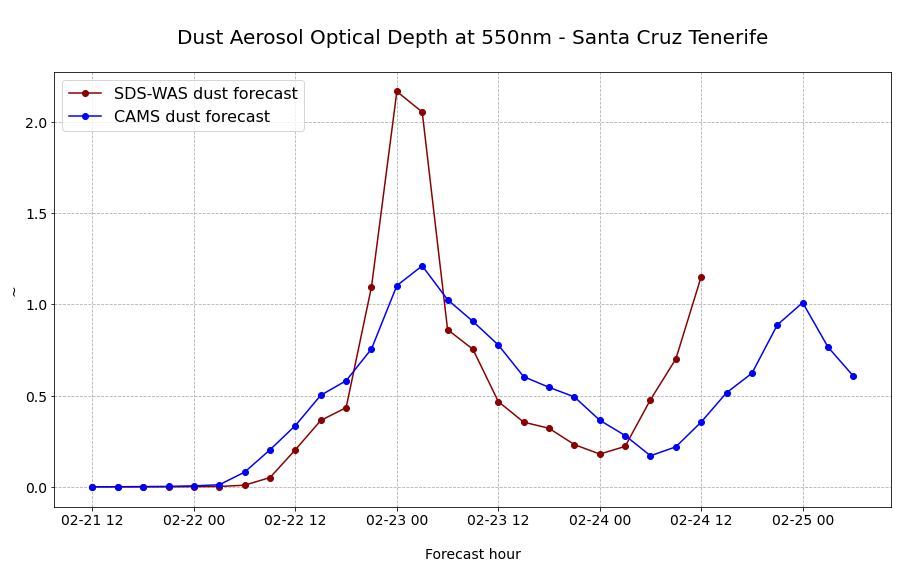

In [59]:
# Initiate a figure
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()

# Define the plotting function
ax.plot(sds_was_ts.time, sds_was_ts, 'o-', color='darkred',  label='SDS-WAS dust forecast')
ax.plot(cams_ts_df.time, cams_ts, 'o-', color='blue', label='CAMS dust forecast')

# Customize the title and axes lables
ax.set_title('\n'+cams_ts.long_name+' - Santa Cruz Tenerife\n', fontsize=20)
ax.set_ylabel(cams_ts.units, fontsize=14)
ax.set_xlabel('\nForecast hour', fontsize=14)

# Customize the fontsize of the axes tickes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a gridline to the plot
ax.grid(linestyle='--')

plt.legend(fontsize=16, loc=2)


<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.